<a href="https://colab.research.google.com/github/JonPaulBIlbao/Marketing-Research/blob/main/Assignment_4_Marketing_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation with R: Assignment 4

*   Elemento de lista
*   Elemento de lista


First of all we will install uninstalled packages and then load all the libraries:

In [ ]:
libs = c('dplyr', 'ggplot2')

# Install not installed packages
not_installed_packages =  libs[!libs %in% installed.packages()]
sapply(not_installed_packages, install.packages)

# Load all packages
sapply(libs, require, character.only = T)

named list()

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2



dplyr ggplot2 
   TRUE    TRUE

Once all packages are installed, I will load the dataset and view it:

In [1]:
url = 'https://raw.githubusercontent.com/JonPaulBIlbao/Marketing-Research/main/marketing_campaign_amounts.csv'
data = read.csv(url)
head(data)

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntCleaningProds
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,5524,635,88,546,172,88,88
2,2174,11,1,6,2,1,6
3,4141,426,49,127,111,21,42
4,6182,11,4,20,10,3,5
5,5324,173,43,118,46,27,15
6,7446,520,42,98,0,42,14


As we can see, we have the following variables:

* **CustomerId**: the id of the customer.
* **frequency**: purchase frequency 
* **recency**: days since last purchase
* **monetary**: average purchase value

The CustomerID is not a variable that characterizes the customer. We will drop it. 

In [ ]:
data$Customer.ID = NULL

Once we have our dataset prepared, we will analyze the data:

  Customer.ID      frequency           recency         monetary      
 Min.   :12346   Min.   :    1.00   Min.   : 0.00   Min.   :   1.30  
 1st Qu.:13947   1st Qu.:   11.00   1st Qu.:11.16   1st Qu.:  11.43  
 Median :15339   Median :   23.00   Median :24.88   Median :  17.58  
 Mean   :15354   Mean   :   56.99   Mean   :32.31   Mean   :  35.84  
 3rd Qu.:16804   3rd Qu.:   47.00   3rd Qu.:57.16   3rd Qu.:  28.02  
 Max.   :18286   Max.   :23808.00   Max.   :70.21   Max.   :1380.00  
 NA's   :1                                                           

  Customer.ID      frequency           recency         monetary    
 Min.   :12346   Min.   :    1.00   Min.   : 0.00   Min.   : 1.30  
 1st Qu.:13948   1st Qu.:   13.00   1st Qu.:11.11   1st Qu.:10.97  
 Median :15329   Median :   25.00   Median :24.01   Median :17.02  
 Mean   :15351   Mean   :   58.99   Mean   :32.35   Mean   :21.50  
 3rd Qu.:16798   3rd Qu.:   49.00   3rd Qu.:57.93   3rd Qu.:25.04  
 Max.   :18286   Max.   :23808.00   Max.   :70.21   Max.   :99.90  
 NA's   :1                                                         

  Customer.ID      frequency        recency         monetary    
 Min.   :12346   Min.   : 1.00   Min.   : 0.00   Min.   : 1.30  
 1st Qu.:13951   1st Qu.:12.00   1st Qu.:12.05   1st Qu.:11.84  
 Median :15322   Median :23.00   Median :26.06   Median :17.38  
 Mean   :15350   Mean   :29.32   Mean   :33.80   Mean   :22.17  
 3rd Qu.:16797   3rd Qu.:41.00   3rd Qu.:58.13   3rd Qu.:25.99  
 Max.   :18286   Max.   :99.00   Max.   :70.21   Max.   :99.90  

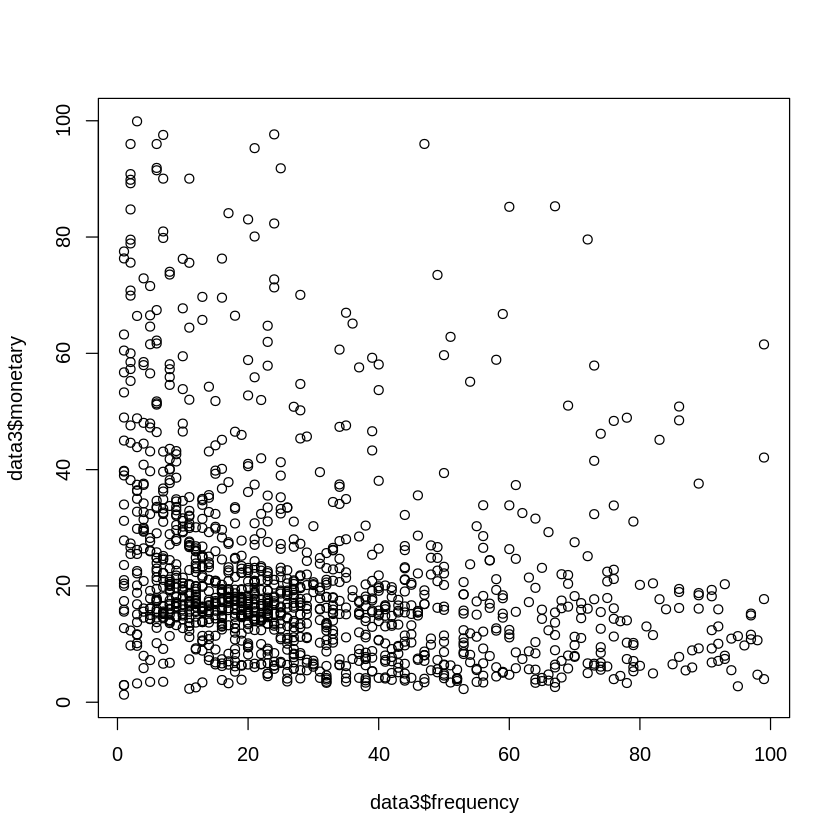

In [ ]:
summary(data)
data2 <- data[data$monetary<100,]
summary(data2)
data3 <- data2[data2$frequency<100,]
plot(data3$frequency,data3$monetary)
summary(data3)

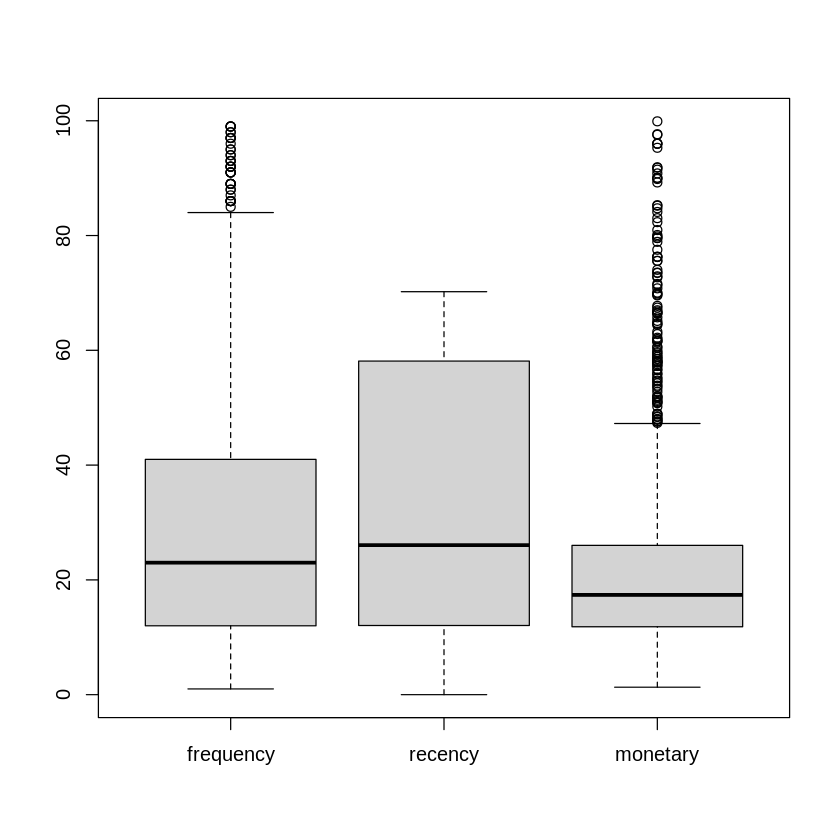

In [ ]:
data3$Customer.ID = NULL
boxplot(data3)

As we can see, different variables have different scales. Thus, it will be necessary to normalize the data. We will do so:

In [ ]:
## Get data for data normalization

# frequency
freq_min = min(data3$frequency)
freq_max = max(data3$frequency)

# recency
rec_max = max(data3$recency)
rec_min = min(data3$recency)

# monetary
mon_min = min(data3$monetary)
mon_max = max(data3$monetary)

Once we have the data neccesary to normalize the data, we will normalize it.

In [ ]:
normalize = function(x){
  (x - min(x))/(max(x) - min(x))
}

data3$frequency = normalize(data3$frequency)
data3$recency   = normalize(data3$recency)
data3$monetary  = normalize(data3$monetary)


  Customer.ID      frequency           recency         monetary      
 Min.   :12346   Min.   :    1.00   Min.   : 0.00   Min.   :   1.30  
 1st Qu.:13947   1st Qu.:   11.00   1st Qu.:11.16   1st Qu.:  11.43  
 Median :15339   Median :   23.00   Median :24.88   Median :  17.58  
 Mean   :15354   Mean   :   56.99   Mean   :32.31   Mean   :  35.84  
 3rd Qu.:16804   3rd Qu.:   47.00   3rd Qu.:57.16   3rd Qu.:  28.02  
 Max.   :18286   Max.   :23808.00   Max.   :70.21   Max.   :1380.00  
 NA's   :1                                                           

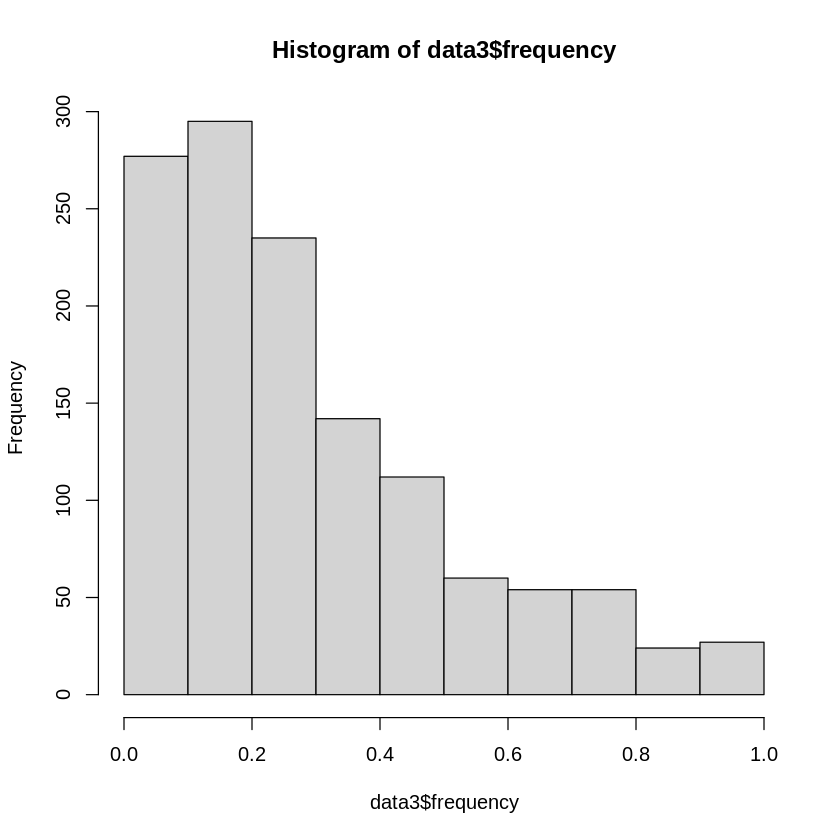

In [ ]:
hist(data3$frequency)
summary(data)

Now that we have normalize the data, we will redo the boxplot to check that the data has been normalized.

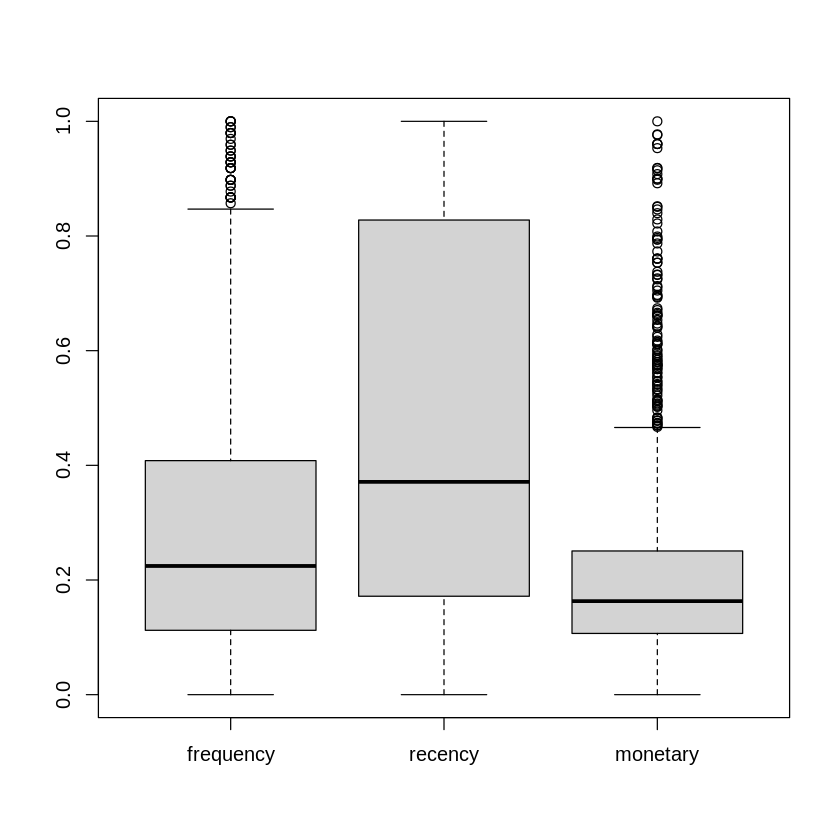

In [ ]:
boxplot(data3)

As we can see, the data is now normalized: all the data has a range from 0 to 1. 

Now we can cluster the data using `kmeans`. As we don't know how much clusters there are, we will first define the number of clusters using the elbow method: 

In [ ]:
error = c()

for(k in 1:20){
  result = kmeans(data3, centers = k, nstart = 1234)
  error = c(error, result$tot.withinss)
}


Warning message:
“did not converge in 10 iterations”


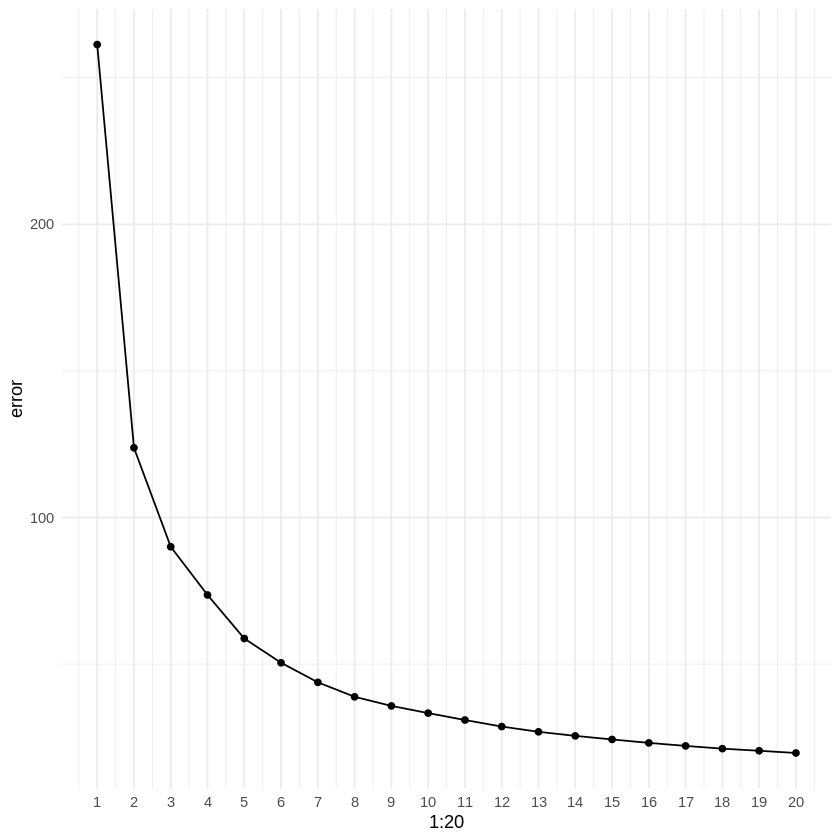

In [ ]:
ggplot() + 
  geom_line(aes(x = 1:20, y = error)) + 
  geom_point(aes(x = 1:20, y = error)) +
  scale_x_continuous(breaks=seq(1,20,1)) +
  theme_minimal()

As we can see, the optimal number of clusters will be around 5. Let's redo the cluster using 5 as the optimal value of *k*.

In [ ]:
result = kmeans(data3, centers = 6, nstart = 1234)

Now we will undo the normalization to analyze the results:

In [ ]:
denormalize = function(x_normalized, x_min, x_max){
   x_normalized * (x_max - x_min) + x_min
}

centers = data.frame(result$centers)
centers$frequency = denormalize(centers$frequency, freq_min, freq_max)
centers$recency = denormalize(centers$recency, rec_min, rec_max)
centers$monetary = denormalize(centers$monetary, mon_min, mon_max)

centers

,frequency,recency,monetary
,<dbl>,<dbl>,<dbl>
1,11.14516,60.50270,58.17182
2,56.28182,60.82277,10.40470
3,17.97727,15.63131,62.62324
4,16.47159,61.42359,18.36754
5,66.09000,12.48722,16.53185
6,21.48718,15.66220,17.83409


Questions:

* What customer segment or segments do you think the company should try to retain?
* In which customer segment does the company have potential for sales growth?  

In [ ]:
letters
for(i in 1:length(letters)){
  print(paste("Value", i, "is : ", letters[i]))
}

[1] "a" "b" "c" "d" "e" "f" "g" "h" "i" "j" "k" "l" "m" "n" "o" "p" "q" "r" "s"
[20] "t" "u" "v" "w" "x" "y" "z"

[1] "Value 1 is :  a"
[1] "Value 2 is :  b"
[1] "Value 3 is :  c"
[1] "Value 4 is :  d"
[1] "Value 5 is :  e"
[1] "Value 6 is :  f"
[1] "Value 7 is :  g"
[1] "Value 8 is :  h"
[1] "Value 9 is :  i"
[1] "Value 10 is :  j"
[1] "Value 11 is :  k"
[1] "Value 12 is :  l"
[1] "Value 13 is :  m"
[1] "Value 14 is :  n"
[1] "Value 15 is :  o"
[1] "Value 16 is :  p"
[1] "Value 17 is :  q"
[1] "Value 18 is :  r"
[1] "Value 19 is :  s"
[1] "Value 20 is :  t"
[1] "Value 21 is :  u"
[1] "Value 22 is :  v"
[1] "Value 23 is :  w"
[1] "Value 24 is :  x"
[1] "Value 25 is :  y"
[1] "Value 26 is :  z"
